# Predicting California Housing Prices using Linear Regression & Exploratory Data Analysis

This project builds a Linear Regression model to predict median house values in California using features such as median income, total rooms, total bedrooms, population, and housing median age.  
The process includes:
- Exploratory Data Analysis (EDA)
- Data cleaning and preprocessing
- Feature selection
- Linear Regression modelling
- Model evaluation (RMSE, R²)
- Visualisation of actual vs predicted prices


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prettier plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [10]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data Cleaning

The dataset contains missing values in the column `total_bedrooms`.  
To prepare the data for modelling, we replace these missing values with the mean  
of the column so that the dataset becomes complete and suitable for Linear Regression.


In [20]:
bedrooms_mean=df['total_bedrooms'].mean()
bedrooms_mean

537.8705525375618

In [24]:
df = df.fillna({"total_bedrooms": bedrooms_mean})


In [26]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
# Selecting features for train_test_split. Assigning X values and Y values
feature_cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income"
]

X = df[feature_cols]
y = df["median_house_value"]

X.head()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


## Feature Selection & Train-Test Split

We select six predictive features related to housing characteristics and  
split the dataset into training (80%) and testing (20%) sets.  
This helps evaluate how well the model generalises to unseen data.


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((16512, 6), (4128, 6))

## Linear Regression Model Training

We train a Linear Regression model using the training dataset  
and then generate predictions on the test dataset for evaluation.


In [49]:
# Training the Linear Regression model

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
# predicting the test set

y_pred = model.predict(X_test)

## Model Evaluation

We evaluate the Linear Regression model using:
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**
- **R² Score**, which shows how much variance in the target variable is explained.

A scatter plot of actual vs predicted values helps visualise the model performance.


In [55]:
# Evaluate model performance

mse = mean_squared_error(y_test, y_pred)    # MSE ----> Mean Squared Error
rmse = np.sqrt(mse)                         # RMSE ----> Root Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R² ----> How much variance is explained by the model

print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.3f}")


MSE:  5,963,976,459.53
RMSE: 77,226.79
R² Score: 0.545


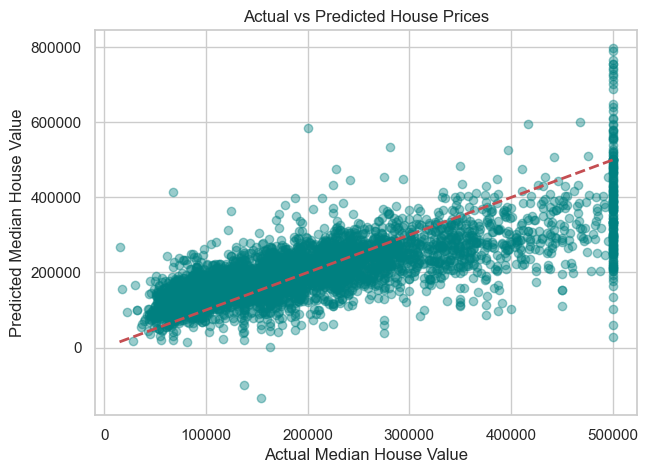

In [57]:
# Scatter plot of Actual vs Predicted values

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.4, color="teal")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)
plt.show()


## Predicting House Prices for New Data

Using the trained model, we can estimate the median house value  
for new, unseen housing data.


In [69]:
# Example: Predict house value for a new region

new_data = pd.DataFrame({
    "housing_median_age": [30],
    "total_rooms": [5000],
    "total_bedrooms": [900],
    "population": [1500],
    "households": [500],
    "median_income": [6.0]
})

predicted_value = model.predict(new_data)[0]

print(f"Predicted House Value: ${predicted_value:,.2f}")


Predicted House Value: $298,536.91


In [73]:
# Inspect feature coefficients ----->> shows how each feature influences the price (positive/negative).

coefficients = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": model.coef_
})
coefficients


,feature,coefficient
0,housing_median_age,1896.998244
1,total_rooms,-20.002819
2,total_bedrooms,101.942122
3,population,-35.651793
4,households,127.029956
5,median_income,47958.908370


## Conclusions

- Built a Linear Regression model to predict **California median house values** using six housing-related features.
- Performed **exploratory data analysis (EDA)**, handled missing values in `total_bedrooms`, and prepared the data for modelling.
- Achieved an **R² score of about 0.54** and an **RMSE of around 77,000 USD**, indicating that the model captures a reasonable amount of variance but there is still noise and non-linearity in the data.
- Visualised the relationship between **actual vs predicted** prices, showing that predictions generally follow the expected trend with some dispersion.
- Used the trained model to estimate house values for **new, unseen data**, demonstrating how the model can be applied in practice.